In [ ]:
# daniel_luft-martinez_7.ipynb

In [1]:
import pandas as pd
import numpy as np
import string
import random

import json

import geopandas as gpd
import pandas_bokeh
import matplotlib.pyplot as plt
import matplotlib as mpl

from fuzzywuzzy import process

import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Range1d
from bokeh.layouts import layout
from bokeh.palettes import Spectral3

from pyproj import Proj, transform
import os
import sys
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.models import ColumnDataSource, Patches
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.io import curdoc
from bokeh.models.selections import Selection
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.layouts import column, row
from bokeh.models import Select
from bokeh.palettes import Spectral5
from bokeh.plotting import curdoc, figure
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, OpenURL, TapTool

import geopandas as gpd
import pandas_bokeh
import geopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pygeocoder

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO
import urllib3

from requests.packages.urllib3.exceptions import InsecureRequestWarning

from joblib import dump,load

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [2]:
plt.rc('figure', figsize=(80, 80))


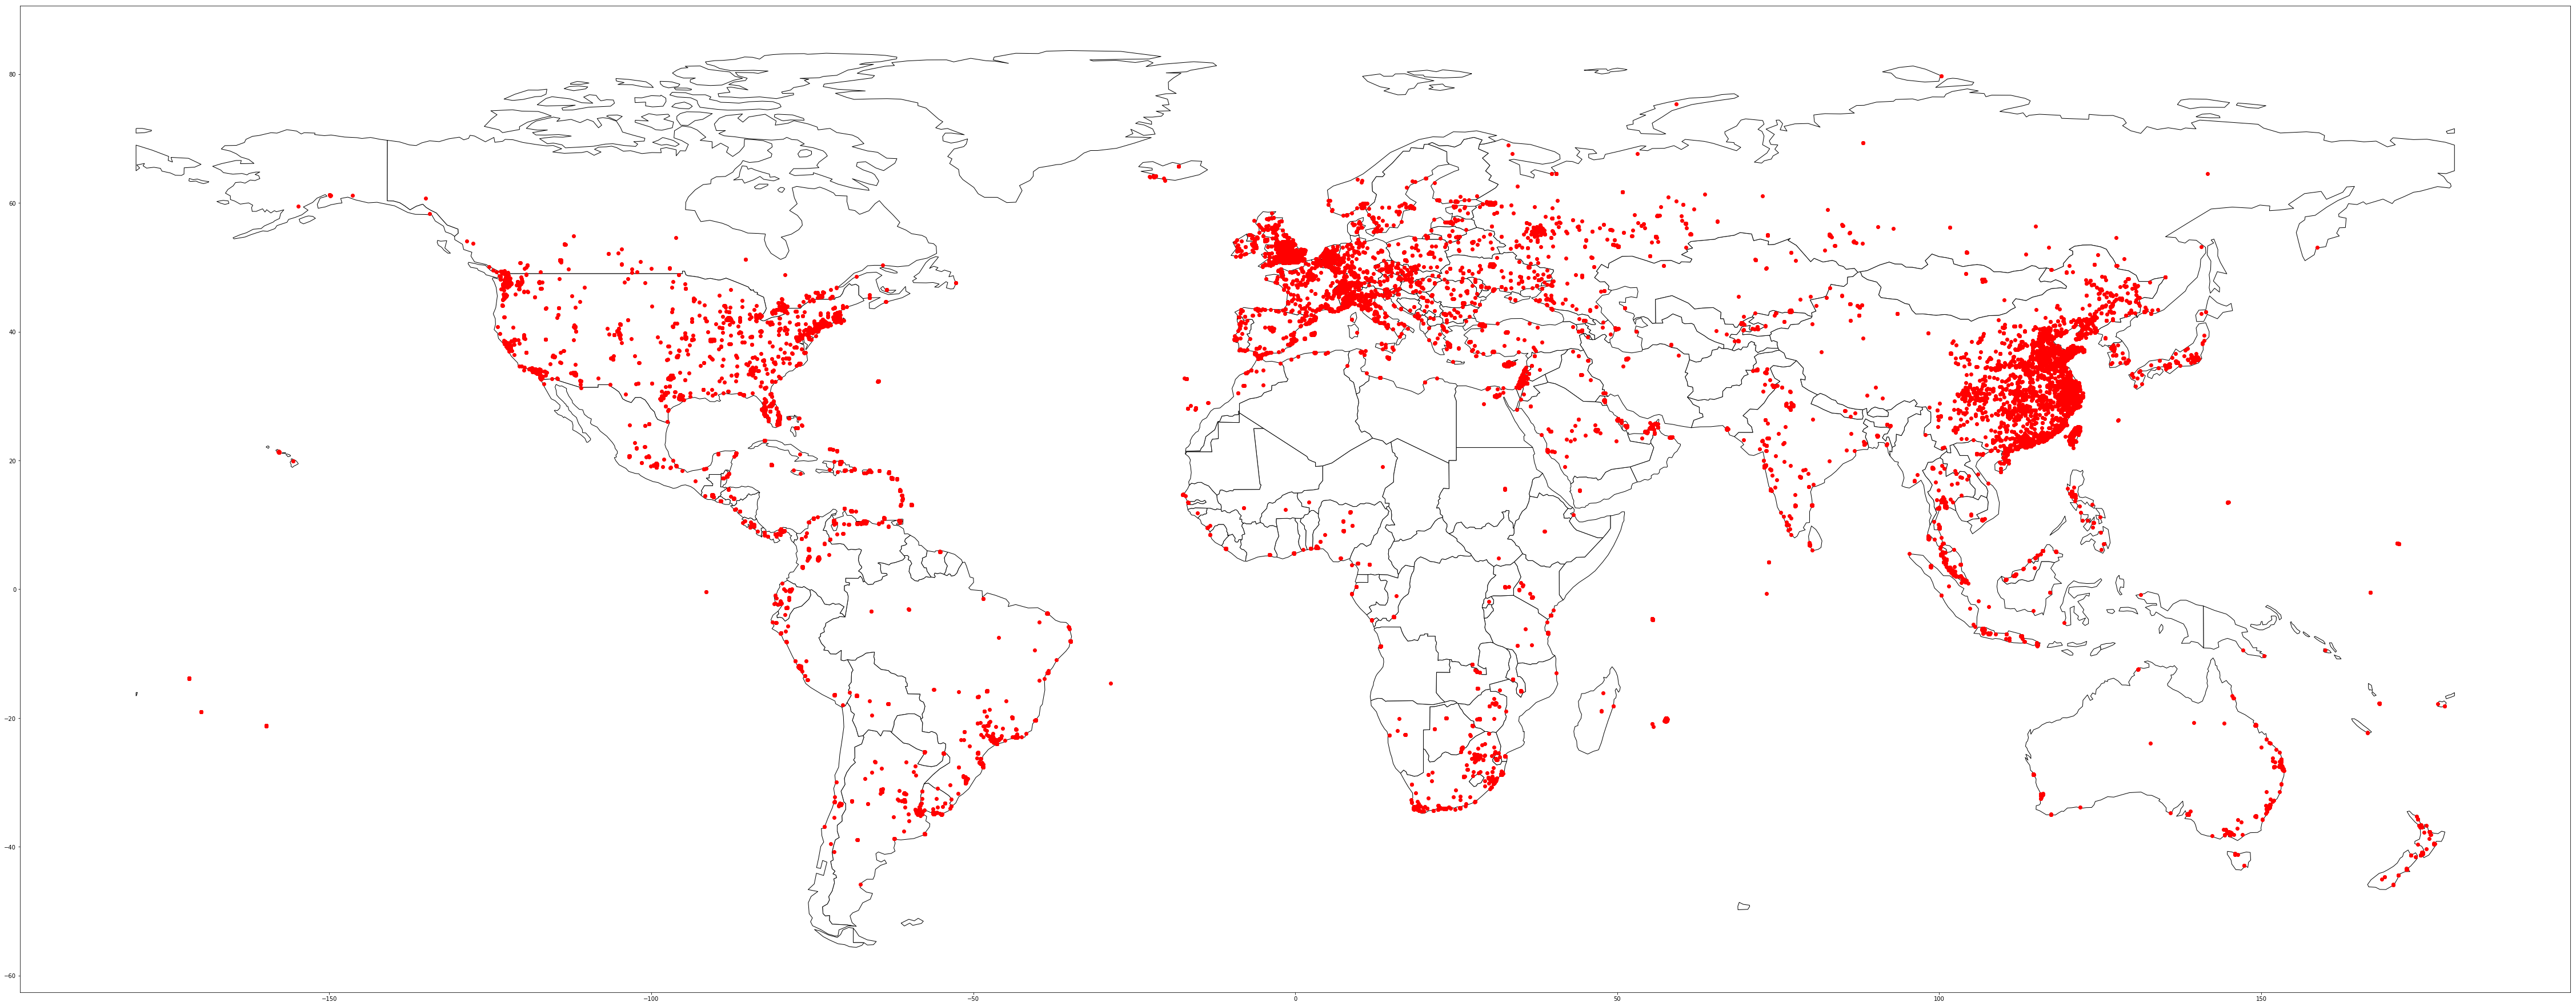

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
#world.plot()
raw_pins = open('A_PINS.txt')
pin_data = json.load(raw_pins)
nodes = []
coords = []
for node, coord in list(pin_data.items()):
    nodes.append(node)
    coords.append(coord)
pin_df  = pd.DataFrame(coords, columns=['lat','lon'])
pin_gdf =  gpd.GeoDataFrame(pin_df, geometry=gpd.points_from_xy(pin_df.lon, pin_df.lat))
ax = world.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
pin_gdf.plot(ax=ax, color='red')

plt.show()

' Officers '

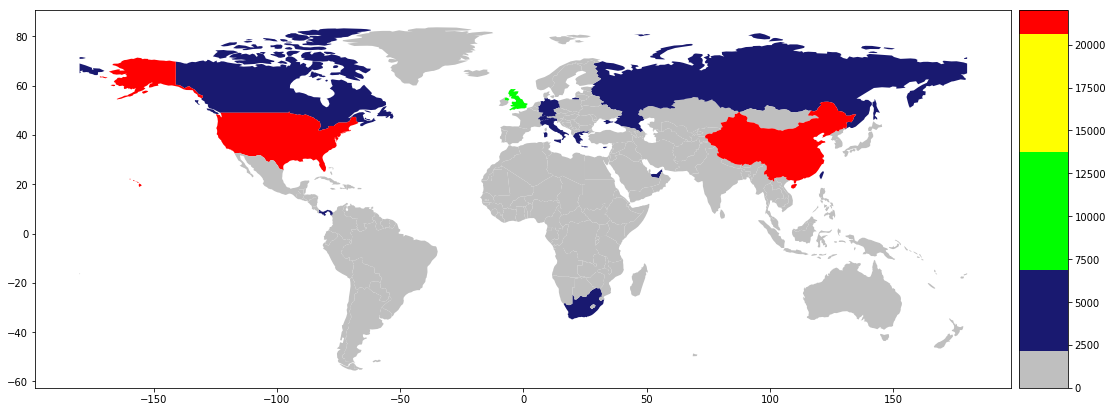

In [4]:
fig, ax = plt.subplots(1, 1)
#world.plot(column='officers', ax=ax, legend=True)
divider = make_axes_locatable(ax)
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
cax = divider.append_axes("right", size="5%", pad=0.1)


viridis = mpl.cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([192/256, 192/256, 192/256, 1])
navy_blue = np.array([25/256,25/256,112/256, 1])
lime_green =  np.array([0/256,256/256,0/256, 1])
yellow = np.array([1,1,0,1])
red = np.array([1,0,0,1])

newcolors[:25, :] = grey
newcolors[25:80, :] = navy_blue
newcolors[80:160, :] = lime_green
newcolors[160:240, :] = yellow
newcolors[240:, :] = red

newcmp = ListedColormap(newcolors)

#dump(Oworld, 'Oworld.joblib')

Oworld2 = load('Oworld.joblib')
#fig.colorbar(ax, ticks=[0, 2500, 6000,1300,2400])
Oworld2.plot(column='officers', ax=ax, cmap=newcmp, legend=True, cax=cax)
""" Officers """

' Intermediarys '

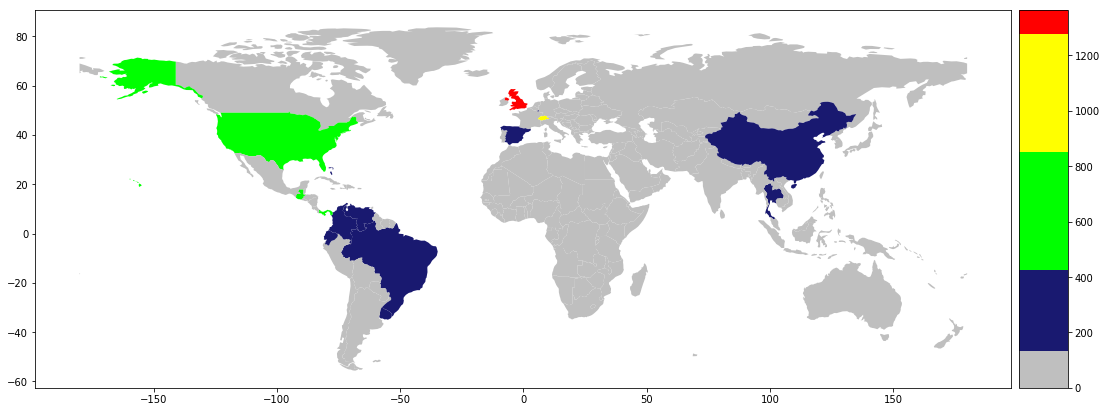

In [5]:
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)
fig.set_size_inches(18.5, 10.5)

cax = divider.append_axes("right", size="5%", pad=0.1)

Iworld = load('Iworld.joblib')
newcmp = ListedColormap(newcolors)

Iworld.plot(column='intermediarys', ax=ax,  cmap=newcmp, legend=True, cax=cax)
""" Intermediarys """

' Entities '

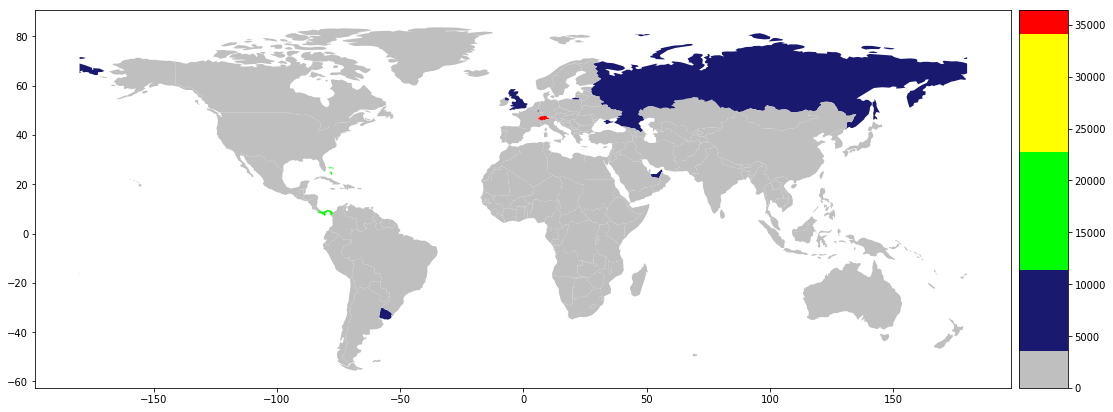

In [6]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
fig.set_size_inches(18.5, 10.5)
cax = divider.append_axes("right", size="5%", pad=0.1)

Eworld = load('Eworld.joblib')
newcmp = ListedColormap(newcolors)


Eworld.plot(column='entitys', ax=ax,  cmap=newcmp, legend=True, cax=cax)

""" Entities """

In [ ]:
# faces


# from requests.packages.urllib3.exceptions import InsecureRequestWarning
# requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
# urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
# plt.rc('figure', figsize=(5, 5))
# name_info = load('faces_stuff.joblib')
# for name in name_info:
#         img_url = name_info[name][0]
#         try:
#             r = requests.get(img_url,verify=False)

#             im = Image.open(BytesIO(r.content))
#             print(name)
#             plt.imshow(im)
#             plt.show()
#         except:
#             print(name, end = ' ')
#             print("could not get image from url")
"""
# output removed for brevety
"""

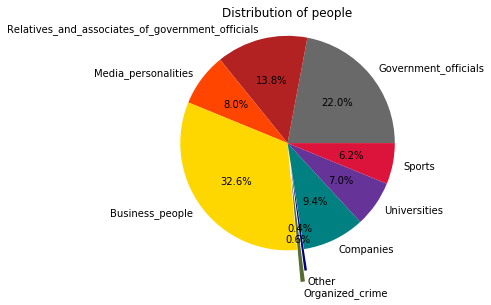

In [8]:
# data viz
plt.rc('figure', figsize=(5,5))
with open("cumPeopleData.json") as file1:
    data1 = json.load(file1)
sizes = []
count = 0
for key in list(data1.keys()):
    sizes.append(len(data1[key]))
    #print(key, len(data1[key]))
    count += len(data1[key])
labels = list(data1.keys())
#print(labels, count)
myColors = ["dimgrey","firebrick","orangered","gold","darkolivegreen","navy","teal","rebeccapurple","crimson"]
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.0, 0.0, 0.0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explodeTuple, colors = myColors)
plt.axis('equal')
plt.title("Distribution of people")
plt.show()

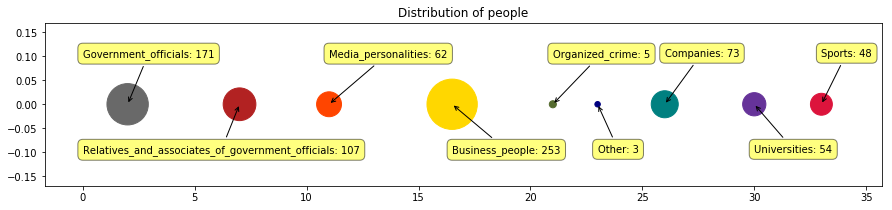

In [9]:
# data viz
plt.rc('figure', figsize=(15,3))
x = [0,2,7,11,16.5,21,23,26,30,33,34]
#x = [(size * 10) for size in sizes]
y = [0,0,0,0,0,0,0,0,0,0,0]
plotSize = [0]
plotSize = plotSize + sizes
plotSize.append(0)
sizes = [size * 10 for size in plotSize]
myColors = ["white","dimgrey","firebrick","orangered","gold","darkolivegreen","navy","teal","rebeccapurple","crimson", "white"]
plt.scatter(x, y, sizes, c=myColors)
labels = ["",'Government_officials: 171', 'Relatives_and_associates_of_government_officials: 107', 'Media_personalities: 62', 'Business_people: 253', 'Organized_crime: 5', 'Other: 3', 'Companies: 73', 'Universities: 54', 'Sports: 48',""]
xyList = [(0, -2), (0, 0.10),(0,-0.1),(11, 0.1),(16.5, -0.1),(21, 0.1),(23, -0.1),(26, 0.1),(30, -0.1),(33, 0.1),]
for index in range(1,len(labels)-1):

    label = labels[index]

    plt.annotate(label,
        xy=(x[index], y[index]), xytext=xyList[index],
        #ha='right', va='bottom', #textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->')) #connectionstyle='arc3,rad=0'))
plt.title("Distribution of people")
plt.show()

<BarContainer object of 2 artists>

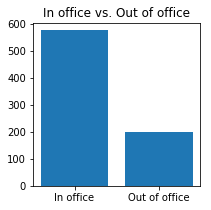

In [10]:
# data viz
plt.rc('figure', figsize=(3,3))
currentStatus = {"In office": 0,"Out of office":0}
for group in list(data1.keys()):
    peopleList = data1[group]
    for person in peopleList:
        if("former" in person):
            currentStatus["Out of office"] += 1
        else:
            currentStatus["In office"] += 1
plt.title("In office vs. Out of office")
plt.bar(currentStatus.keys(), currentStatus.values())

In [11]:
# the good part
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, OpenURL, TapTool
#output_file("toolbar.html")
final_int_df = pd.read_csv('final_int_df.csv')
final_int_df.columns = ["name", "address", "lat", 'lon', 'img', 'url']
#print(final_int_df.head())
data = final_int_df
source = ColumnDataSource(
        data=final_int_df
    )

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@img" height="100" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@name</span>
                <span style="font-size: 15px; color: #966;">@name</span>
            </div>

        </div>
        """
    )

p = figure(x_axis_type="mercator", y_axis_type="mercator", plot_height = 600 , plot_width = 950, toolbar_location = None,tools=[hover,'tap','reset'],title="Mouse over the dots")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
json_data = world.to_json()
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
p.patches('xs','ys', source = geosource, line_color = 'black', line_width = 0.25,fill_alpha = -1, fill_color={ 'transform': 'white'})



# use the "color" column of the CDS to complete the URL
# e.g. if the glyph at index 10 is selected, then @color
# will be replaced with source.data['color'][10]
url = "@url"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)



p.circle('lon', 'lat',color='red', size=5, source=source)
bokeh.io.reset_output()
output_notebook()
show(p)

Loading BokehJS ...

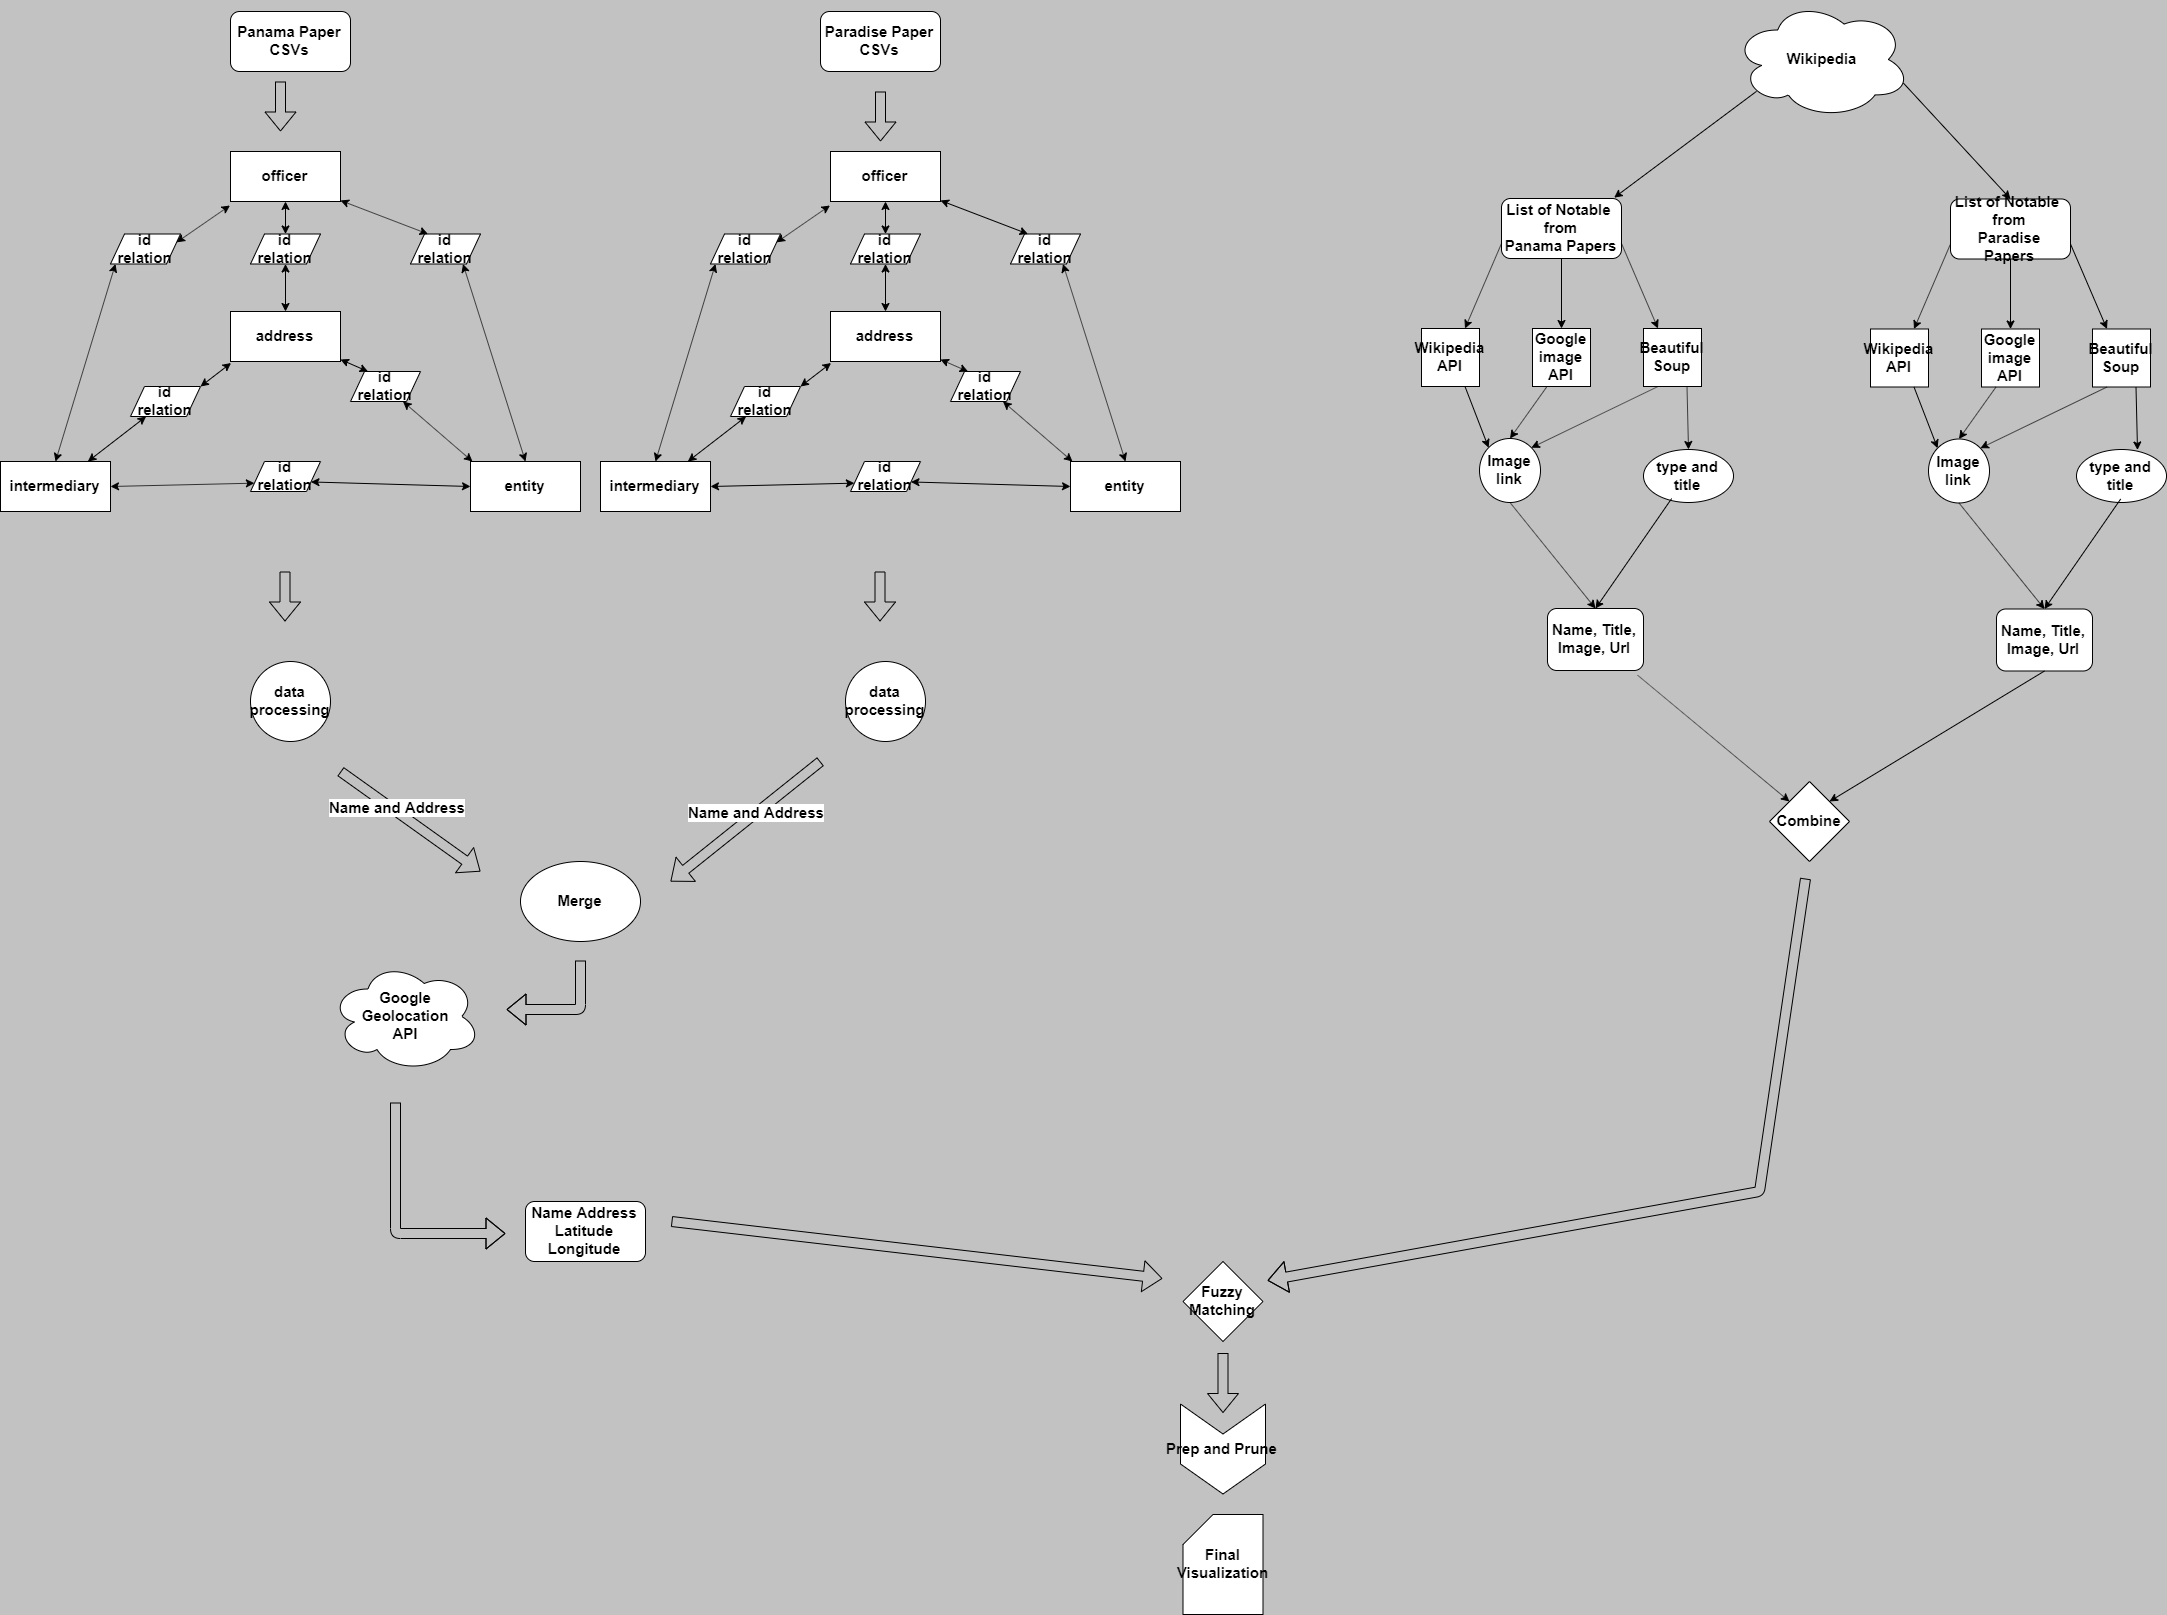

In [12]:
# data processing graph
from IPython.display import Image
Image(filename='graph_3.png') 

In [13]:
#question?